<h1 style="text-align: center;" >
Experiment 4 <br> 
The Laws of Radiation <br> 
Rayleigh-Jeans and Planck's(Energy Density)
</h1> 


In [6]:
import numpy as np
from scipy.integrate import quad
'''plotting necessities'''
%matplotlib ipympl
import matplotlib.pyplot as plt
plt.style.use("bmh")
'''Some constants'''
h = 6.6e-34 #planck's
C = 3e8 #speed of light
k = 1.38e-23 #boltzmann


## Rayleigh Jean's criterion
According to Rayleigh-Jeans, em waves confined to a cavity at temperature $T$ with walls as
perfect reflectors consist of standing waves filling a certain volume V0 of the cavity, with density
of states given by

**Density of States**
$$
G(\nu)d\nu = \frac{8\pi \nu^2 d\nu}{c^3}V_0 \implies G(\nu)d\left(\frac{\nu}{\nu_0}\right) = \frac{\pi}{\nu_0} \left(\frac{\nu }{\nu_0}\right)^2d\left(\frac{\nu}{\nu_0}\right) 
$$
where $V_0 = l_0^3$ and $\nu_0 := c/(2l_0)$, if $x := \nu/\nu_0$

$$
G(\nu)dx = \frac{\pi}{\nu_0} x^2dx
$$

Therefore, Density of states($G^{*}$, which is unfortunately dimensional) as a function of dimensionless variable $x$,
$$
G^{*}(x) = \frac{\pi}{\nu_0} x^2 \implies \boxed{G^{*}(x) \nu_0 = \pi x^2} 
$$



**Energy Density of States**

since E.M. waves consists of two degrees of freedom, each
of the standing waves shall have energy $\bar{\epsilon} = kT$ according to the Law of Equipartition of energy.
Thus, the energy density for a particular mode will be
$$u(\nu)d\nu = \bar{\epsilon}\dfrac{G(\nu)d\nu}{V_0} = \dfrac{8π\nu^2kT}{c^3} d\nu$$

Let $x = \frac{h\nu}{kT}$ and $l_0 = \frac{hc}{kT}$

$$u(\nu)d\nu = \frac{8\pi kT}{l_0^3}x^2dx = \dfrac{8kT}{l_0^3} f_{RJ}(x)dx$$

we define, $$\boxed{f_{RJ}(x) := \pi x^2}$$
$$\implies u(\nu)\frac{kT}{h}dx = \dfrac{8kT}{l_0^3} f_{RJ}(x)dx$$
let $u(\nu) \equiv u^*(x)$
$$\implies u^*(x)dx = \dfrac{8h}{l_0^3} f_{RJ}(x)dx$$

Energy density(function of frequency) $u(\nu)d\nu$
    $$\boxed{u(\nu) \equiv u^*(x) = \dfrac{8h}{l_0^3} f_{RJ}(x)}$$




In [82]:
rj_gsv0 = lambda x: np.pi*x**2

sf = lambda T: 8*(k*T)**3/(h**2*C**3)

def rj_u(nu,t):
    es = k*t
    ls = h*C/es
    x = h*nu/es
    frj = rj_gsv0(x) 
    u = sf(t)*frj
    return(x,frj,u)

Slope:  2.0


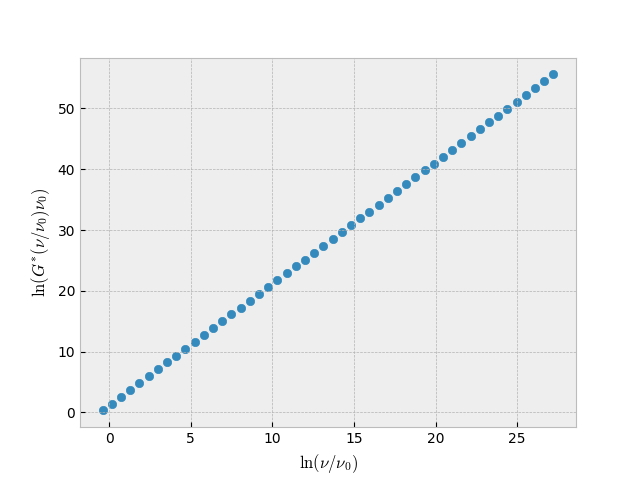

In [83]:
nu_range = 10**np.linspace(18,30,50)
nu_0 = C/2e-10
x_range = nu_range/nu_0 
fig,ax = plt.subplots(1,1)
#ax.scatter(x_range,rj_gsv0(x_range))
x_ = np.log(x_range)
y_ = np.log(rj_gsv0(x_range))
ax.scatter(x_,y_)
print("Slope: ",(y_[-1]-y_[-2])/(x_[-1]-x_[-2]))
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel(r'$\ln(\nu/\nu_0)$');ax.set_ylabel(r"$\ln(G^{*}(\nu/\nu_0)\nu_0)$")
plt.show()

In [84]:
p_gsv0 = lambda x: np.pi*x**3/(np.exp(x)-1)

def planck_u(nu,t):
    es = k*t
    ls = h*C/es
    x = h*nu/(k*t)
    f = p_gsv0(x)
    u = sf(t)*f
    return(x,f,u)
    
rj_u = np.vectorize(rj_u)
planck_u = np.vectorize(planck_u)


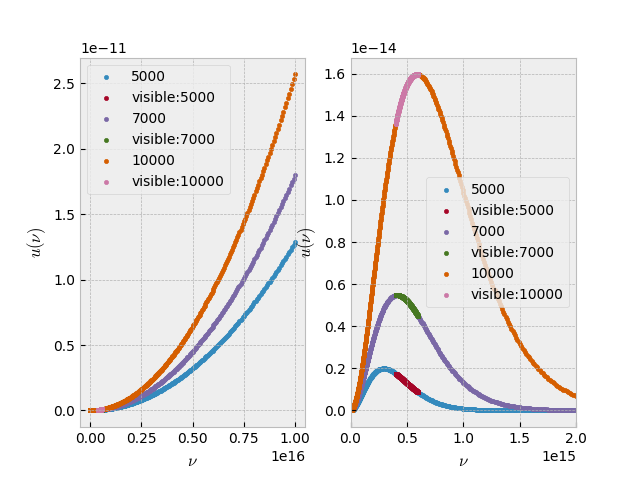

In [100]:
nu_range = 10**np.linspace(12.8,16,10**3)
vi_nurange = np.linspace(4e14,6e14,10**3)
lam_range = C/nu_range
temp_vals = np.array([5000,7000,10000])
fig,(ax1,ax2) = plt.subplots(1,2)
for temp in temp_vals:
    rjxarr,rf,ru = rj_u(nu_range,temp)
    pxarr,pf,pu = planck_u(nu_range,temp)
    #print(pxarr)
    ax1.scatter(nu_range,ru, marker=r".",label=f"{temp}")
    ax1.scatter(vi_nurange,rj_u(vi_nurange,temp)[2], marker=r".",label=f"visible:{temp}")
    ax2.scatter(nu_range,pu, marker=r".",label=f"{temp}")
    ax2.scatter(vi_nurange,planck_u(vi_nurange,temp)[2], marker=r".",label=f"visible:{temp}")
    #ax2.set_xscale("log")
ax1.set_xlabel(r"$\nu$");ax1.set_ylabel(r"$u(\nu)$");
ax2.set_xlabel(r"$\nu$");ax2.set_ylabel(r"$u(\nu)$");
ax2.set_xbound([0,2e15])
ax1.legend()
plt.legend()
plt.show()
